<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


**Project Scenario:** You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

<h6> About the dataset:
<ul>
<li>CRIM - per capita crime rate by town</li>
<li>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li>INDUS - proportion of non-retail business acres per town.</li>
<li>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)</li>
<li>NOX - nitric oxides concentration (parts per 10 million)</li>
<li>RM - average number of rooms per dwelling</li>
<li>AGE - proportion of owner-occupied units built prior to 1940</li>
<li>DIS - weighted distances to five Boston employment centres</li>
<li>RAD - index of accessibility to radial highways</li>
<li>TAX - full-value property-tax rate per $10,000</li>
<li>PTRATIO - pupil-teacher ratio by town</li>
<li>LSTAT - % lower status of the population</li>
<li>MEDV - Median value of owner-occupied homes in $1000's</li>
<ul>
</h6>

#### **Import the required libraries we need for the lab.**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats 
import statsmodels.api as sm 
from statsmodels.formula.api import ols

#### **Read the dataset in the csv file from the URL**

In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### **Task 1:** Familiarize with the dataset


In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
boston_df.drop('Unnamed: 0', axis= 1, inplace= True)

In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


###### The dataset has 13 numeric columns with 506 observations

#### **Task 2:** Generate Descriptive Statistics and Visualizations

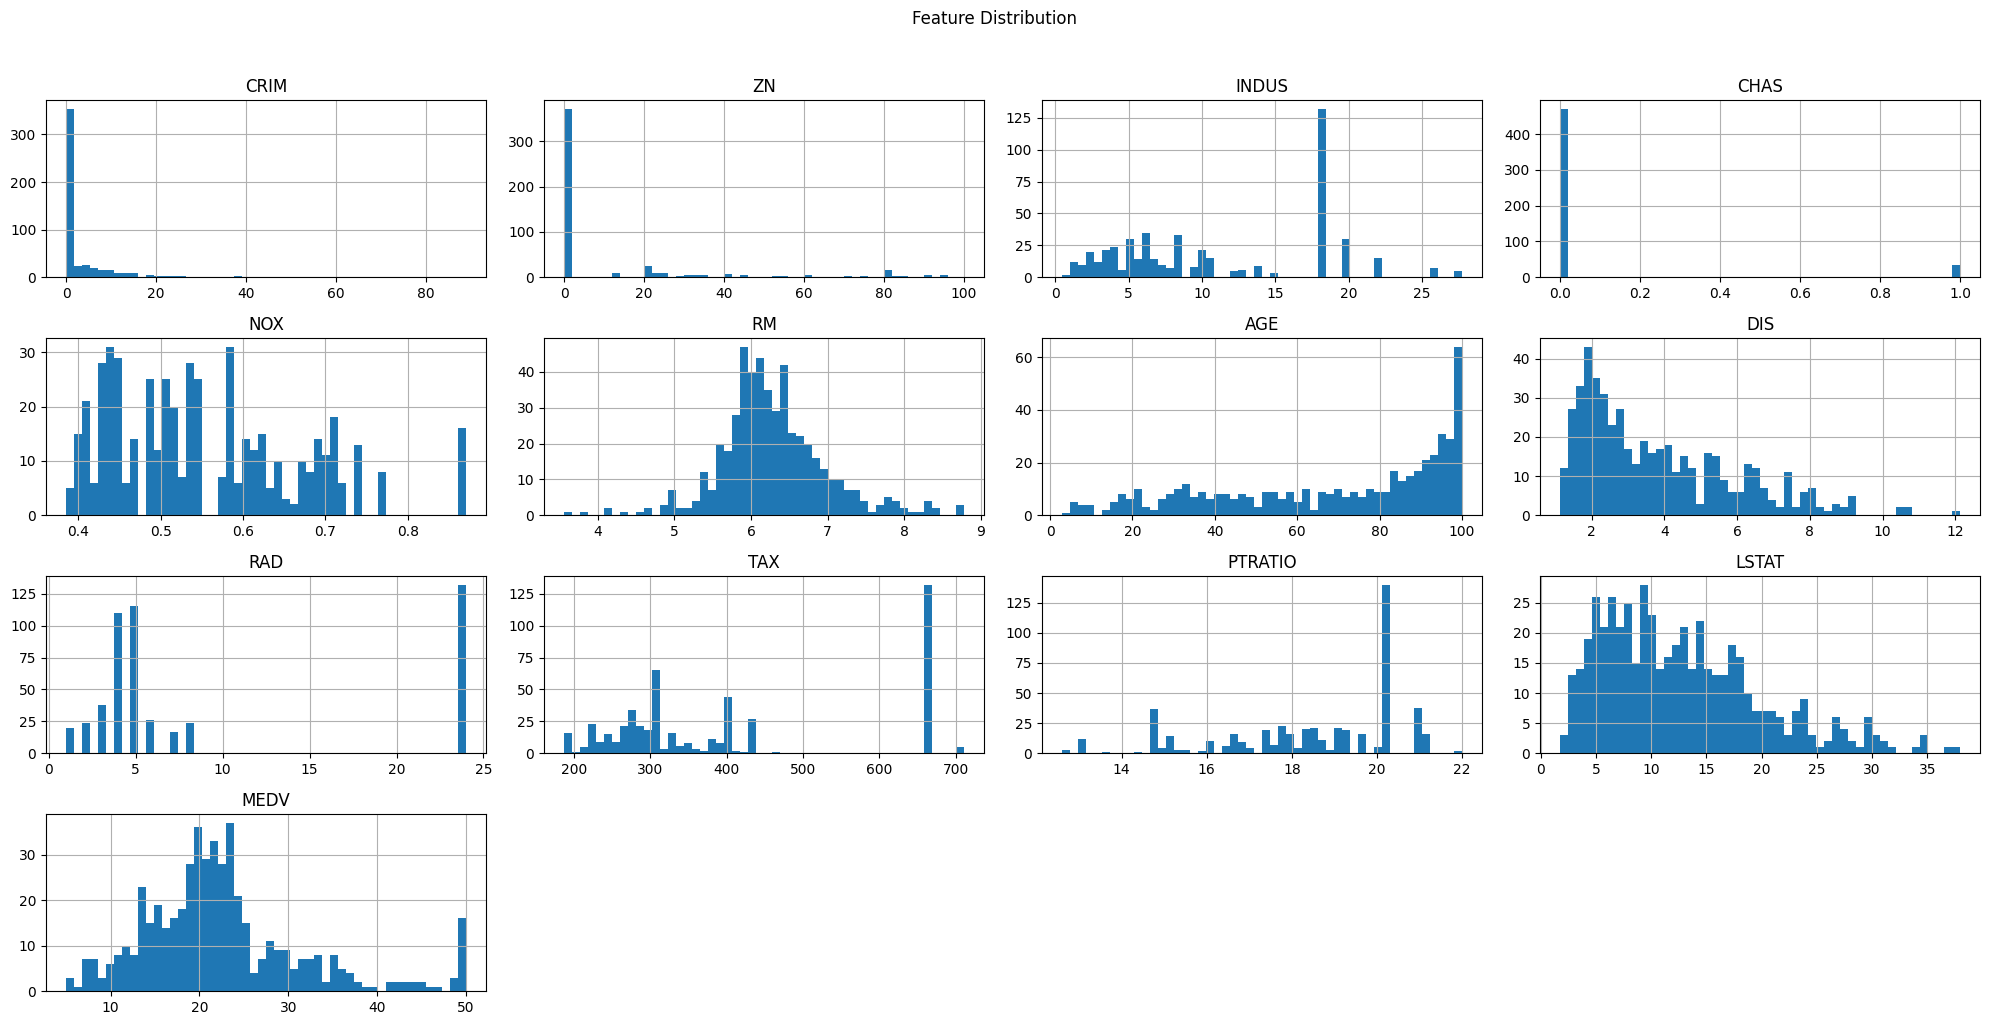

In [7]:
boston_df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

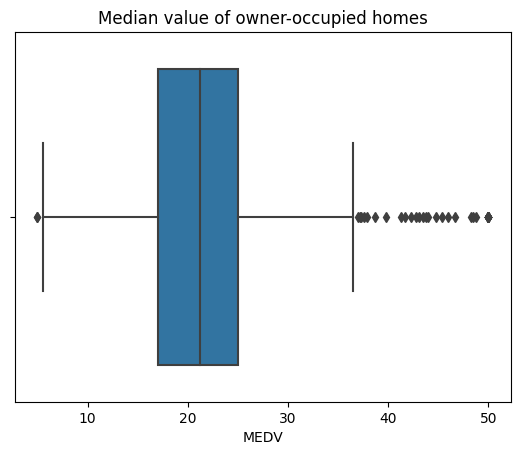

In [9]:
# Boxplot: Median value of owner-occupied homes
ax = sns.boxplot(x= 'MEDV', data= boston_df)
ax.set_title('Median value of owner-occupied homes')
plt.show()

<h6>This box plot represents the distribution of the variable MEDV (Median home value in thousands of dollars, as in the Boston housing dataset). Here are some observations based on the plot: </br>

<strong>Median and IQR:</strong>
The median value of MEDV is approximately 21
The IQR shows that the middle 50% of the data points fall between about 17 and 25, indicating moderate variability within the main distribution.

<strong>Outliers:</strong>
There are several outliers on the right (above Q3), extending up to 50. These values represent homes with significantly higher median values than the rest.
A few outliers are also present on the left (below Q1), though they are less extreme than those on the right. These represent homes with lower median values.

<strong>Distribution Shape:</strong>
The right side (upper whisker) is longer, and there are more outliers on the higher end. This suggests the distribution of MEDV is right-skewed (positively skewed), with some homes having very high median values.

<strong>Potential Cap:</strong>
The plot suggests a concentration of values around the upper end (at 50), which could indicate a capping of values at this limit. In the Boston housing dataset, for example, 50 was the maximum value recorded for MEDV, which might explain the clustering near this value.

<strong>Summary:</strong>
This plot shows that while most homes have median values around 21, there is a skew towards higher values, with a significant number of outliers. This could imply that there are some high-value homes in the dataset that deviate from the central tendency. The skew and outliers could affect statistical analyses that assume normality or homogeneous variance.
</h6>

In [10]:
boston_df['CHAS'] = boston_df['CHAS'].astype(int)

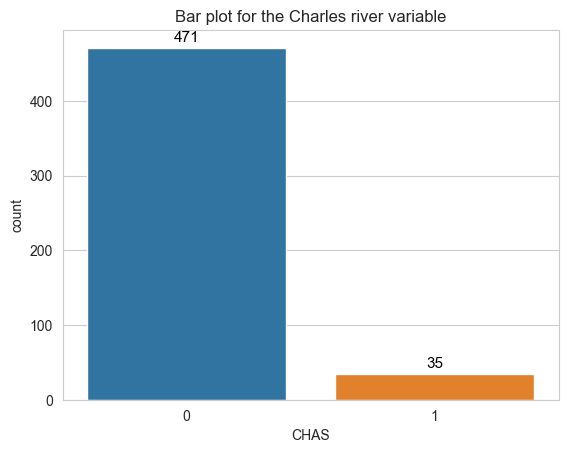

In [11]:
# Bar plot for the Charles river variable
sns.set_style('whitegrid')
ax = sns.countplot(x= 'CHAS',  data= boston_df, )
ax.set_title('Bar plot for the Charles river variable')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=11, color='black', 
                xytext=(0, 4), 
                textcoords='offset points')

plt.show()

<h6>CHAS Variable represents a binary indicator, with 0 meaning "not adjacent to the Charles River" and 1 meaning "adjacent to the Charles River."<br>
There are 471 instances where CHAS is 0, meaning the vast majority of observations are not adjacent to the Charles River.<br>
There are only 35 instances where CHAS is 1, indicating that only a small portion of the dataset represents properties near the river.<br>
<strong>Imbalance:</strong> The data is heavily imbalanced, with a much larger count for properties that are not near the Charles River (471) compared to those that are (35). This might affect any analysis related to the CHAS variable, as the group sizes are very different.
</h6>

In [12]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['age_group'] = boston_df['AGE'].apply(lambda x: '35-' if x <= 35 else 'between 35 to 70' if x < 70 else '70+')
boston_df['age_group'] = boston_df['age_group'].astype('category')
boston_df['age_group'] = boston_df['age_group'].cat.set_categories(['35-', 'between 35 to 70', '70+'], ordered=True)

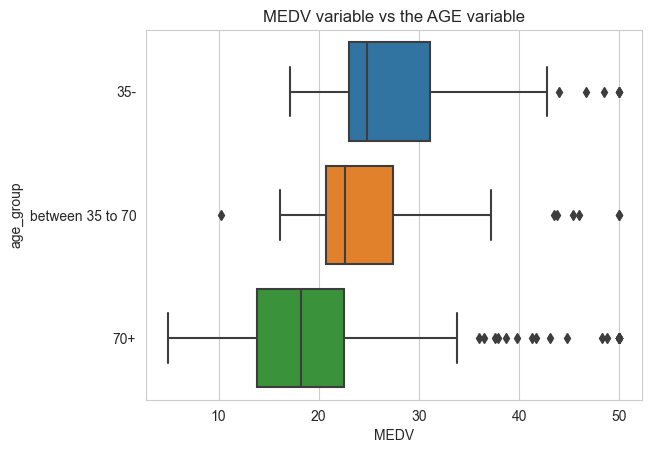

In [13]:
ax = sns.boxplot(x= 'MEDV', y= 'age_group', data= boston_df)
ax.set_title('MEDV variable vs the AGE variable')
plt.show()

<h6>
This box plot shows the distribution of MEDV (median home value) across three age groups for homes based on the AGE variable:
<ul>
<li><strong>Age Group 35- (Younger Homes):</strong>
Homes that are 35 years and younger have the highest median MEDV compared to the other age groups.<br>
The interquartile range (IQR) is relatively wide, and the median line lies closer to the lower quartile, indicating high variability in MEDV within this age group. This suggests that while many homes in this group have high values, there’s a considerable spread among them.<br>
Additionally, there are some high-value outliers, indicating a few homes with significantly higher median values, creating a right-skewed distribution of MEDV for this age group.<br>

<li><strong>Age Group between 35 to 70 (Middle-aged Homes):</strong>
The median MEDV is lower than in the youngest age group but higher than the oldest group.
The narrow IQR for the middle-aged group suggests that homes in this age range have more consistent MEDV values, likely due to more standardized characteristics or similar levels of desirability in the market. This contrasts with the higher variability seen in newer and much older homes, where unique factors can lead to a broader range of values.
Outliers are present on both the lower and upper ends, but more in the upper end, creating a right-skewed distribution of MEDV for this age group.<br>

<li><strong>Age Group 70+ (Older Homes):</strong>
Homes that are 70 years and older tend to have the lowest median MEDV among the three groups.
The IQR for this group is also relatively wide, indicating that there’s more spread in median values.
There are numerous outliers, especially on the higher end, showing that a few older homes have relatively high median values despite the general trend.<br>
</ul>
<strong>Summary</strong><br>
<li><strong>Trend</strong>: There appears to be a negative association between the age of homes and their median value — younger homes generally have higher median values, while older homes tend to have lower median values.<br>
<li><strong>Variability</strong>: Older homes (70+) show a wider range of MEDV values and more high-value outliers, which may be due to historical or architectural factors for select properties.<br>
<li><strong>Implications</strong>: This trend might indicate that newer homes (age <= 35) are valued higher, possibly due to newer construction, modern amenities, or desirable locations. In contrast, older homes may vary more in value due to age-related factors, maintenance, or historical significance.
</h6>

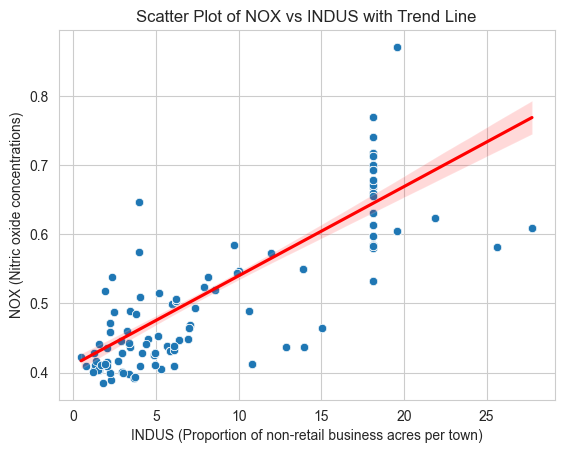

In [14]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
ax = sns.scatterplot(x= 'INDUS', y= 'NOX', data= boston_df)
sns.regplot(x= 'INDUS', y= 'NOX', data= boston_df, ax= ax, scatter= False, line_kws= {'color': 'red'})
plt.xlabel('INDUS (Proportion of non-retail business acres per town)')
plt.ylabel('NOX (Nitric oxide concentrations)')
plt.title('Scatter Plot of NOX vs INDUS with Trend Line')
plt.show()

<h6>
<strong>Positive Correlation:</strong> There is a clear positive relationship between NOX and INDUS, as indicated by the upward trend of the data points and the trend line. This suggests that areas with a higher proportion of non-retail business acres tend to have higher nitric oxide concentrations.<br>
<strong>Strength of Relationship:</strong> While the relationship is positive, there is some variability in the data. The points are not tightly clustered around the trend line, indicating moderate correlation.<br>
<strong>Environmental Implication:</strong> The positive association could imply that industrial or business zones are contributing to higher NOX concentrations, which might have environmental and health implications.<br>
<strong>Confidence Interval:</strong> The shaded region around the trend line represents the confidence interval, showing the range of expected NOX values for a given INDUS value. It widens slightly at higher INDUS values, indicating increased uncertainty in the prediction.<br>

<strong>Conclusion:</strong><br>
There is a positive association between NOX (nitric oxide concentrations) and INDUS (proportion of non-retail business acres per town), suggesting that as the proportion of non-retail business acres increases, NOX levels also tends to be higher.<br>
This implies that areas with higher industrial or business activity may have higher levels of nitric oxide.
</h6>

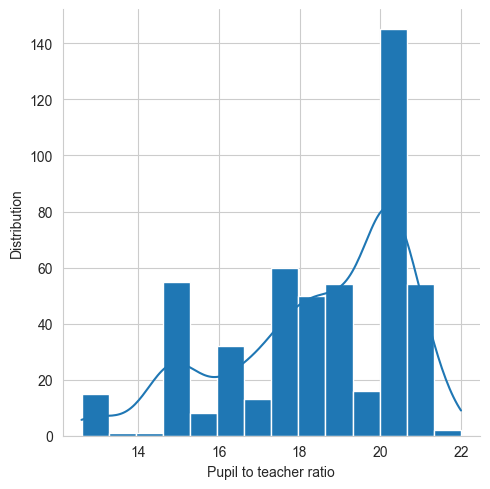

In [15]:
# Create a histogram for the pupil to teacher ratio variable
ax = sns.displot(boston_df['PTRATIO'], kde= True, alpha= 1)
ax.set_titles('Histogram for the pupil to teacher ratio variable')
plt.xlabel('Pupil to teacher ratio')
plt.ylabel('Distribution')
plt.show()

<h6>
The histogram, illustrates the distribution of the pupil-to-teacher ratio in the dataset. Key observations:<br>
<strong>Left-Skewed Distribution:</strong> The data shows a slight right skew, with the majority of values concentrated between 18 and 20, while fewer schools have a lower ratio (below 14.7).<br>
<strong>Peak Frequency:</strong> The highest concentration occurs at a ratio of approximately 21, indicating that most schools have a pupil-to-teacher ratio near this value.<br>
<strong>Spread:</strong> The distribution is relatively tight, with only a few outliers at the lower and higher ends, suggesting limited variability in pupil-to-teacher ratios across the dataset.<br>

This distribution highlights a central tendency towards a standardized pupil-to-teacher ratio, potentially reflecting education policies or resource constraints in the analyzed region.<br>
</h6>

In [16]:
boston_df['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

<h6>The distribution of PTRATIO (Pupil - Teacher ratio) runs from 12.6 to 22., left-skewed with most values from 14.7 to 21.3, the variability is high</h6>

#### **Task 3:** Use the appropriate tests to answer the questions

**Question 1:** Is there a significant difference in median value of houses bounded by the Charles river or not?

In [17]:
near_Charles_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_near_Charles_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

<H6>
Hypothesis:<br>
H0: u1 = u2  (There's no difference in means of median value of houses bounded by Charles river)<br>
H1: u1 <> u2 (There's difference in means of median value of houses bounded by Charles river) <br>

Use α = 0.05
</h6>

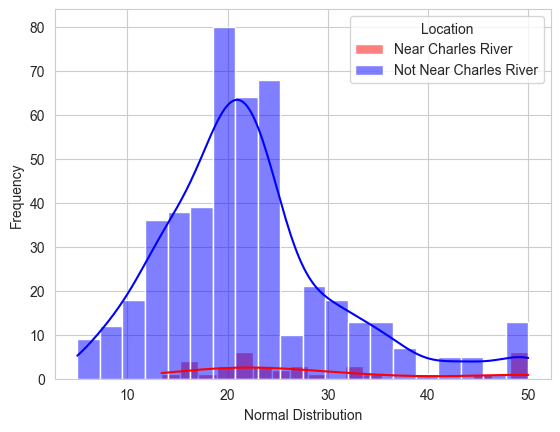

In [18]:
sns.histplot(near_Charles_river, bins=20, kde=True, color='red', label='Near Charles River')
sns.histplot(not_near_Charles_river, bins=20, kde=True, color='blue', label='Not Near Charles River')

# Adding labels and legend
plt.xlabel('Normal Distribution')
plt.ylabel('Frequency')
plt.legend(title='Location')
plt.show()

<h6> We assume that these groups have normal distribution </h6>

In [19]:
scipy.stats.levene(near_Charles_river, not_near_Charles_river, center= 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

###### Since the p-value is less than 0.05 we can assume there's no equality of variance

In [20]:
scipy.stats.ttest_ind(near_Charles_river, not_near_Charles_river, equal_var= False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

<h6> 
<strong>Conclusion: </strong>Since the p-value is less than 0.05, we reject the null hypothesis. <br>
That indicates that there's a significant difference in the mean median values of houses located near Charles river compared to those that are not.
</h6>

**Question 2:** Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

<h6>
We first divide age into 3 groups: 30-, 30 -> 70 and 70+<br>
State the hypothesis:<br>
H0:  u1 = u2 = u3<br>
H1: At least one of the means differs <br>

Use α = 0.05
</h6>

In [21]:
age_35_and_younger = boston_df[boston_df['age_group'] == '35-']['MEDV']
age_35_70 =  boston_df[boston_df['age_group'] == 'between 35 to 70']['MEDV']
age_70_and_older = boston_df[boston_df['age_group'] == '70+']['MEDV']

In [22]:
# Test for equality of variance
scipy.stats.levene(
    age_35_and_younger, age_35_70, age_70_and_older,
    center= 'mean'
)

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

###### since the p-value is greater than 0.05, the variance are equal

In [23]:
scipy.stats.f_oneway(age_35_and_younger, age_35_70, age_70_and_older)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

<h6><strong>Conclusion: </strong>Since the p-value is less than 0.05, we reject the null hypothesis as there is no significant evidence that at least one of the means differ</h6>

**Question 3:** Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

<h6>
State hypothesis<br>
H0: There's no relationship between Nitric oxide concentrations and proportion of non retail business acres per town<br>
H1: There's relationship between Nitric oxide concentrations and proportion of non retail business acres per town<br>

Use α = 0.05
</h6>

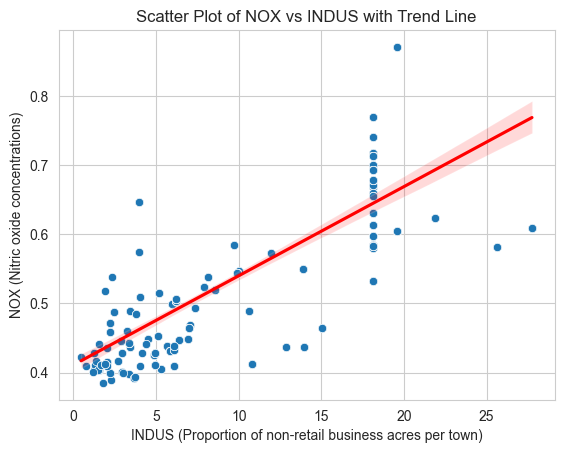

In [24]:
# Draw scatter chart
ax = sns.scatterplot(x= 'INDUS', y= 'NOX', data= boston_df)
sns.regplot(x= 'INDUS', y= 'NOX', data= boston_df, scatter= False, ax= ax, line_kws= {'color': 'red'})
plt.xlabel('INDUS (Proportion of non-retail business acres per town)')
plt.ylabel('NOX (Nitric oxide concentrations)')
plt.title('Scatter Plot of NOX vs INDUS with Trend Line')
plt.show()

In [25]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209158, pvalue=7.91336106123623e-98)

<h6>
<strong>Conclusion: </strong>Given the Pearson Coefficient is 0.76365 and p-value less than 0.05, we reject the null hypothesis as there's statistical evidence that there's a positive relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
</h6>

**Question 4:** What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

<h6>
State hypothesis:<br>
H0: Weighted distance to the five Boston employment centers has no statistically significant impact on the median value of owner-occupied homes.<br>
H1: Weighted distance to the five Boston employment centers has a statistically significant impact on the median value of owner-occupied homes.<br>

Use α = 0.05
</h6>


In [26]:
x = boston_df['DIS'] # Weighted distances to five Boston employment centres
y = boston_df['MEDV'] # Median value of owner-occupied homes in $1000's
x = sm.add_constant(x)
model = sm.OLS(y, x).fit() # fit model
prediction = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        20:35:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h6>
Relationship Between Distance (DIS) and Median Home Value (MEDV):

The coefficient for DIS is 1.0916, indicating that for every unit increase in the weighted distance to Boston employment centers, the median value of owner-occupied homes is expected to increase by 1.0916 units.
The p-value for DIS is 0.000, which is less than the typical significance level (𝛼 =0.05), suggesting that this relationship is statistically significant.<br>

Model Fit:
The R-squared value is 0.062, meaning the model explains about 6.2% of the variance in the median home value. While statistically significant, this suggests that the distance to employment centers only accounts for a small portion of the variation in home values.
The low Adjusted R-squared (0.061) confirms that the model's explanatory power is limited, even when adjusted for the number of predictors.<br>

Intercept (Constant):
The constant coefficient is 18.3901, representing the predicted median home value when the weighted distance (DIS) is zero. This value is also statistically significant (p-value = 0.000).
<br>Model Diagnostics:

F-statistic (33.58) and its corresponding p-value (1.21e-08) indicate that the overall model is statistically significant.
Durbin-Watson (0.570): Suggests potential positive autocorrelation in residuals, which may warrant further investigation.
Omnibus (139.779) and Prob(Omnibus) (0.000): Indicate that residuals are not normally distributed, as supported by skewness (1.466) and kurtosis (5.424).<br>

<strong>Conclusion:</strong>
The regression analysis shows a statistically significant positive relationship between the weighted distance to Boston employment centers and the median value of owner-occupied homes. However, the model explains only a small fraction of the variance in home values, and diagnostic indicators suggest potential issues with residuals and autocorrelation that should be addressed to improve model reliability.